<a href="https://colab.research.google.com/github/Mohammed-Amad/Automatic-Essay-Grading-/blob/main/nlpessaygrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Install Required Libraries and Set Environment Variables

The following command installs all necessary libraries for training an instruction-tuned transformer using Unsloth, and TRL.

After installation, environment variables are set to configure the training setup, such as disabling mixed precision (FP16/AMP) for full 32-bit precision training


In [ ]:
# Install dependencies
!pip install -q unsloth trl peft accelerate bitsandbytes datasets
!pip install -U transformers unsloth

import os
os.environ["USE_FP16"] = "false"
os.environ["USE_AMP"] = "false"
os.environ["UNSLOTH_FORCE_FULL_PRECISION"] = "true"
os.environ["TORCH_DTYPE"] = "float32"
os.environ["ACCELERATE_MIXED_PRECISION"] = "no"
os.environ["WANDB_DISABLED"] = "true"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 🧠 Load Model (Unsloth + Mistral 7B 4-bit)

This snippet loads a memory-efficient 4-bit quantized version of Mistral-7B and prepares it for PEFT using LoRA.



In [ ]:
from unsloth import FastLanguageModel
from transformers import AutoTokenizer

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/mistral-7b-instruct-v0.2-bnb-4bit",
    max_seq_length=2048,
    dtype=None,
    load_in_4bit=True
)

model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=["q_proj", "v_proj"],
    lora_alpha=32,
    lora_dropout=0.25,
    bias="none",
    use_gradient_checkpointing=True
)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using

==((====))==  Unsloth 2025.5.9: Fast Mistral patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.25.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.5.9 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


# Upload DS File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_essay_data_1000.jsonl to synthetic_essay_data_1000.jsonl


# Split the Data to Train/Validtion/Test

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

df = pd.read_json("synthetic_essay_data_1000.jsonl", lines=True)

if "__index_level_0__" in df.columns:
    df = df.drop(columns=["__index_level_0__"])

dataset = Dataset.from_pandas(df)

train_test = dataset.train_test_split(test_size=0.2, seed=42)
val_test = train_test['test'].train_test_split(test_size=0.5, seed=42)
dataset = DatasetDict({
    "train": train_test['train'],
    "validation": val_test['train'],
    "test": val_test['test']
})


# 🧾 Format for Instruction Tuning

This function extracts components from a unified text field (like a prompt) and formats them into an instruction-style input/output pair for supervised fine-tuning.



In [ ]:
def format_example(example):
    instruction = "Grade the following student essay and explain the rationale."
    input_text = (
        f"Question: {example['question']}\n"
        f"Reference Answer: {example['reference_answer']}\n"
        f"Mark Scheme: {example['mark_scheme']}\n"
        f"Student Answer: {example['student_answer']}"
    )
    output_text = f"Score: {example['score']}\nRationale: {example['rationale']}"
    return {"input": f"{instruction}\n\n{input_text}", "output": output_text}

dataset = dataset.map(format_example)

def formatting_func(example):
    return [f"{example['input']}\n{example['output']}"]

def prepare(example):
    return {"text": formatting_func(example)[0]}

dataset["train"] = dataset["train"].map(prepare)
dataset["test"] = dataset["test"].map(prepare)
dataset["validation"] = dataset["validation"].map(prepare)


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

# 🏋️‍♂️ Train the Essay Grading Model

This section sets up the `SFTTrainer` from the `trl` library to fine-tune the model on the formatted essay dataset. It disables Weights & Biases tracking and uses memory-efficient optimization with AdamW.

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments, TrainerCallback

from transformers import TrainerCallback

class LossCallback(TrainerCallback):
    def __init__(self):
        self.train_loss = []
        self.eval_loss = []
        self.last_train_loss = None

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.train_loss.append((state.global_step, logs["loss"]))
                self.last_train_loss = logs["loss"]
            if "eval_loss" in logs:
                self.eval_loss.append((state.global_step, logs["eval_loss"]))


loss_callback = LossCallback()

training_args = TrainingArguments(
    output_dir="./essay-grader-model",
    logging_strategy="steps",
    logging_steps=10,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    num_train_epochs=2,
    learning_rate=1e-4,
    save_strategy="epoch",
    save_total_limit=1,
    fp16=False,
    bf16=False,
    optim="adamw_torch",
    eval_strategy="steps",
    eval_steps=10,
    report_to="none"
)


In [ ]:
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    dataset_text_field="text",
    max_seq_length=2048,
    formatting_func=None,
    args=training_args,
    callbacks=[loss_callback]
)

trainer.train()




Unsloth: Tokenizing ["text"]:   0%|          | 0/800 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"]:   0%|          | 0/100 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 800 | Num Epochs = 2 | Total steps = 200
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 6,815,744/7,000,000,000 (0.10% trained)


Step,Training Loss,Validation Loss
10,0.099000,0.100923
20,0.098000,0.092872
30,0.095300,0.093774
40,0.092300,0.084669
50,0.085800,0.082419
60,0.074700,0.077409
70,0.073900,0.073402
80,0.067700,0.066219
90,0.064000,0.061642
100,0.060000,0.056196


TrainOutput(global_step=200, training_loss=0.06191794872283936, metrics={'train_runtime': 1983.8854, 'train_samples_per_second': 0.806, 'train_steps_per_second': 0.101, 'total_flos': 1.138759123525632e+16, 'train_loss': 0.06191794872283936})

# 📉 Visualize Training and Validation Loss per Step

This code prints the training and validation losses side-by-side for each step where both exist, calculates their absolute difference, and then plots the losses over training steps to help monitor convergence and detect overfitting.



Step	Training Loss	Validation Loss	Diff
10	0.0990		0.1009		0.0019
20	0.0980		0.0929		0.0051
30	0.0953		0.0938		0.0015
40	0.0923		0.0847		0.0076
50	0.0858		0.0824		0.0034
60	0.0747		0.0774		0.0027
70	0.0739		0.0734		0.0005
80	0.0677		0.0662		0.0015
90	0.0640		0.0616		0.0024
100	0.0600		0.0562		0.0038
110	0.0549		0.0487		0.0062
120	0.0444		0.0428		0.0016
130	0.0381		0.0434		0.0053
140	0.0411		0.0425		0.0014
150	0.0436		0.0417		0.0019
160	0.0408		0.0417		0.0009
170	0.0414		0.0415		0.0001
180	0.0403		0.0416		0.0013
190	0.0426		0.0417		0.0009
200	0.0404		0.0417		0.0013


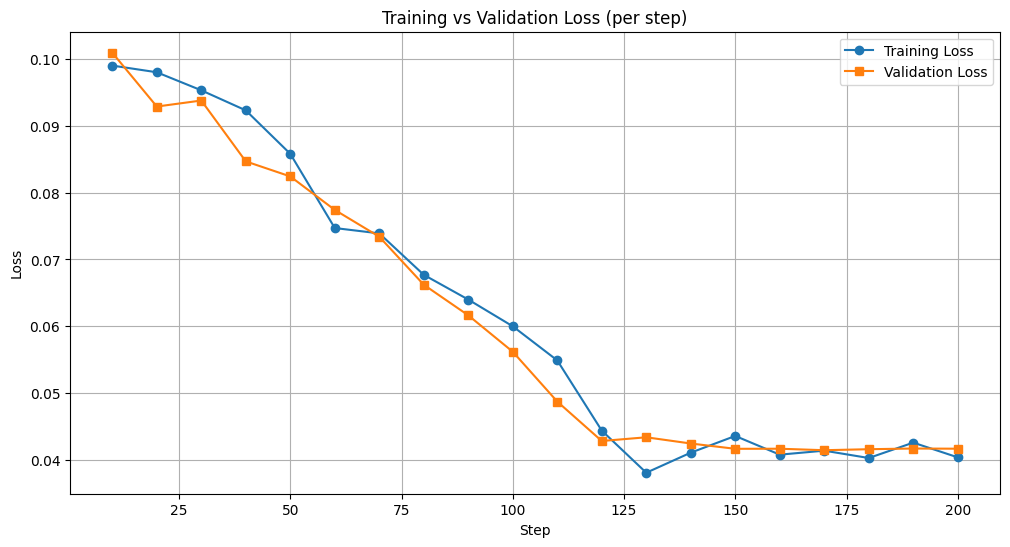

In [ ]:
print("\nStep\tTraining Loss\tValidation Loss\tDiff")
val_dict = dict(loss_callback.eval_loss)
for step, train_loss in loss_callback.train_loss:
    val_loss = val_dict.get(step)
    if val_loss is not None:
        diff = abs(val_loss - train_loss)
        print(f"{step}\t{train_loss:.4f}\t\t{val_loss:.4f}\t\t{diff:.4f}")

import matplotlib.pyplot as plt

train_steps = [x[0] for x in loss_callback.train_loss]
train_losses = [x[1] for x in loss_callback.train_loss]
val_steps = [x[0] for x in loss_callback.eval_loss]
val_losses = [x[1] for x in loss_callback.eval_loss]

plt.figure(figsize=(12,6))
plt.plot(train_steps, train_losses, label="Training Loss", marker="o")
plt.plot(val_steps, val_losses, label="Validation Loss", marker="s")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (per step)")
plt.legend()
plt.grid(True)
plt.show()

# 🧪 Evaluate Model Predictions on Test Dataset

This code evaluates the model's predicted scores against the actual scores from the test dataset. It extracts the score from the model's generated response, filters out invalid scores, and calculates both accuracy and mean absolute error (MAE).




In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, mean_absolute_error

def extract_score_no_regex(text):
    for line in text.split("\n"):
        if "Score:" in line:
            val = line.split("Score:")[1].strip().split()[0]
            try:
                return int(float(val))
            except ValueError:
                continue
    return None

predicted_scores = []
actual_scores = []

for ex in tqdm(dataset["test"]):
    prompt = (
        "Grade the following student essay. ONLY respond in this format:\n"
        "Score: <number>\n"
        "Rationale: <reason>\n\n"
        f"Question: {ex['question']}\n"
        f"Reference Answer: {ex['reference_answer']}\n"
        f"Mark Scheme: {ex['mark_scheme']}\n"
        f"Student Answer: {ex['student_answer']}\n"
    )
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=120,
        temperature=0.3,
        top_p=0.9,
        top_k=5
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_score = extract_score_no_regex(response)
    actual_score = extract_score_no_regex(ex["output"])

    if predicted_score is not None and actual_score is not None and 0 <= predicted_score <= 4:
        predicted_scores.append(predicted_score)
        actual_scores.append(actual_score)
    else:
        print("\n❌ Model Output (problem extracting score):", response)
        print("✅ Expected Output:", ex["output"])

accuracy = accuracy_score(actual_scores, predicted_scores)
mae = mean_absolute_error(actual_scores, predicted_scores)

print(f"\nAccuracy: {accuracy:.2%}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


100%|██████████| 100/100 [11:48<00:00,  7.08s/it]


Accuracy: 85.00%
Mean Absolute Error (MAE): 0.15


# 📝 Interactive Essay Grader with Model Response Parsing

This script allows you to interactively enter a question, reference answer, mark scheme, and student answer. It then prompts the model to grade the essay and provide a rationale.

In [ ]:
import re

def extract_first_complete_score_and_rationale(text):
    matches = re.findall(r"Score:\s*(\d+)\s*Rationale:(.*?)(?:\n|$)", text, re.DOTALL)
    for score, rationale in matches:
        rationale = rationale.strip()
        if rationale and rationale.lower() != "none":
            return score, rationale
    if matches:
        return matches[0][0], matches[0][1].strip()
    return "Not found", "Not found"

def print_first_result(question, reference_answer, mark_scheme, student_answer, model_output):
    score, rationale = extract_first_complete_score_and_rationale(model_output)
    if not rationale:
        rationale = "لم يعطِ الموديل سببًا (rationale) للإجابة."
    print("\n" + "="*50)
    print(f"Question: {question}")
    print(f"Reference Answer: {reference_answer}")
    print(f"Mark Scheme: {mark_scheme}")
    print(f"Student Answer: {student_answer}")
    print(f"Score: {score}")
    print(f"Rationale: {rationale}")
    print("="*50)

while True:
    print("\nEnter your question and answers for the model (or type 'exit' to stop):")
    question = input("Question: ")
    if question.lower().strip() == "exit":
        break
    reference_answer = input("Reference Answer: ")
    mark_scheme = input("Mark Scheme (JSON as string!): ")
    student_answer = input("Student Answer: ")

    user_prompt = (
        "Grade the following student essay. ONLY respond in this format:\n"
        "Score: <number>\n"
        "Rationale: <reason>. Please always provide a rationale, do not leave it blank.\n\n"
        f"Question: {question}\n"
        f"Reference Answer: {reference_answer}\n"
        f"Mark Scheme: {mark_scheme}\n"
        f"Student Answer: {student_answer}\n"
    )
    inputs = tokenizer(user_prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=200,
        temperature=0.3,
        top_p=0.9,
        top_k=5
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print_first_result(question, reference_answer, mark_scheme, student_answer, response)



Enter your question and answers for the model (or type 'exit' to stop):
Question: Explain the greenhouse effect
Reference Answer: The greenhouse effect is the trapping of heat in the Earth's atmosphere by greenhouse gases such as carbon dioxide and methane. These gases allow sunlight to enter but prevent heat from escaping, leading to warming.
Mark Scheme (JSON as string!): "1": "Defines the greenhouse effect correctly", "2": "Mentions greenhouse gases (e.g., CO2, methane)", "3": "Explains the mechanism (sunlight in, heat trapped)", "4": "Mentions warming or climate impact"
Student Answer: The greenhouse effect happens when the sun’s heat is trapped in the atmosphere by gases like CO2. This makes the Earth warmer.


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Question: Explain the greenhouse effect
Reference Answer: The greenhouse effect is the trapping of heat in the Earth's atmosphere by greenhouse gases such as carbon dioxide and methane. These gases allow sunlight to enter but prevent heat from escaping, leading to warming.
Mark Scheme: "1": "Defines the greenhouse effect correctly", "2": "Mentions greenhouse gases (e.g., CO2, methane)", "3": "Explains the mechanism (sunlight in, heat trapped)", "4": "Mentions warming or climate impact"
Student Answer: The greenhouse effect happens when the sun’s heat is trapped in the atmosphere by gases like CO2. This makes the Earth warmer.
Score: 3
Rationale: Mentions gases and warming but omits details.

Enter your question and answers for the model (or type 'exit' to stop):
Question: exit 


In [ ]:
import re

def extract_first_complete_score_and_rationale(text):
    matches = re.findall(r"Score:\s*(\d+)\s*Rationale:(.*?)(?:\n|$)", text, re.DOTALL)
    for score, rationale in matches:
        rationale = rationale.strip()
        if rationale and rationale.lower() != "none":
            return score, rationale
    if matches:
        return matches[0][0], matches[0][1].strip()
    return "Not found", "Not found"

def print_first_result(question, reference_answer, mark_scheme, student_answer, model_output):
    score, rationale = extract_first_complete_score_and_rationale(model_output)
    if not rationale:
        rationale =
    print("\n" + "="*50)
    print(f"Question: {question}")
    print(f"Reference Answer: {reference_answer}")
    print(f"Mark Scheme: {mark_scheme}")
    print(f"Student Answer: {student_answer}")
    print(f"Score: {score}")
    print(f"Rationale: {rationale}")
    print("="*50)

while True:
    print("\nEnter your question and answers for the model (or type 'exit' to stop):")
    question = input("Question: ")
    if question.lower().strip() == "exit":
        break
    reference_answer = input("Reference Answer: ")
    mark_scheme = input("Mark Scheme (JSON as string!): ")
    student_answer = input("Student Answer: ")

    user_prompt = (
        "Grade the following student essay. ONLY respond in this format:\n"
        "Score: <number>\n"
        "Rationale: <reason>. Please always provide a rationale, do not leave it blank.\n\n"
        f"Question: {question}\n"
        f"Reference Answer: {reference_answer}\n"
        f"Mark Scheme: {mark_scheme}\n"
        f"Student Answer: {student_answer}\n"
    )
    inputs = tokenizer(user_prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=200,
        temperature=0.3,
        top_p=0.9,
        top_k=5
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print_first_result(question, reference_answer, mark_scheme, student_answer, response)



Enter your question and answers for the model (or type 'exit' to stop):
Question: What is love and why is it important in human life?
Reference Answer: Love is a deep emotional connection or affection towards another person or thing. It is important in human life because it helps build strong relationships, supports mental well-being, and motivates people to care for each other and create a sense of belonging.
Mark Scheme (JSON as string!): "1": "Defines love clearly", "2": "Mentions why love is important", "3": "Refers to relationships or connection", "4": "Explains impact on well-being or society"
Student Answer: Love means caring about someone and wanting them to be happy. It is important because it helps people feel connected and not alone.


The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Question: What is love and why is it important in human life?
Reference Answer: Love is a deep emotional connection or affection towards another person or thing. It is important in human life because it helps build strong relationships, supports mental well-being, and motivates people to care for each other and create a sense of belonging.
Mark Scheme: "1": "Defines love clearly", "2": "Mentions why love is important", "3": "Refers to relationships or connection", "4": "Explains impact on well-being or society"
Student Answer: Love means caring about someone and wanting them to be happy. It is important because it helps people feel connected and not alone.
Score: 3
Rationale: Mentions the main idea and provides a detailed explanation.

Enter your question and answers for the model (or type 'exit' to stop):
Question: exit
